## Liading initial modules 

In [8]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

data_path='../data/KAGGLE_DS/kaggle_creditcard.csv'

## Loading the data

In [9]:
df = pd.read_csv(data_path)
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


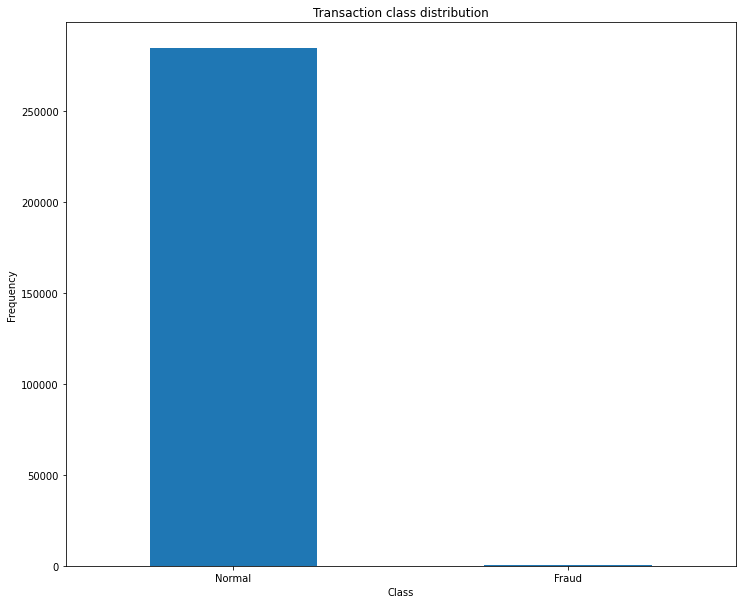

In [107]:
LABELS = ['Normal', 'Fraud']
count_classes = pd.value_counts(df['Class'])
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
labels.value_counts() / labels.size * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

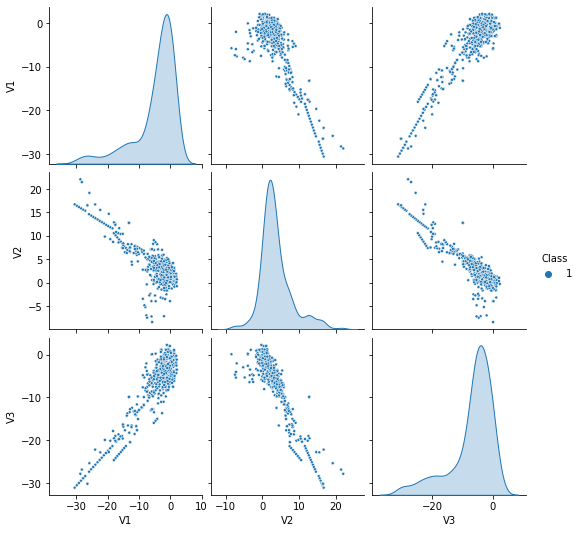

In [33]:
sns.pairplot(df[df['Class']==1], vars=["V1", "V2", "V3"], hue='Class',markers='.')
plt.rcParams['figure.figsize'] = 30.0,90

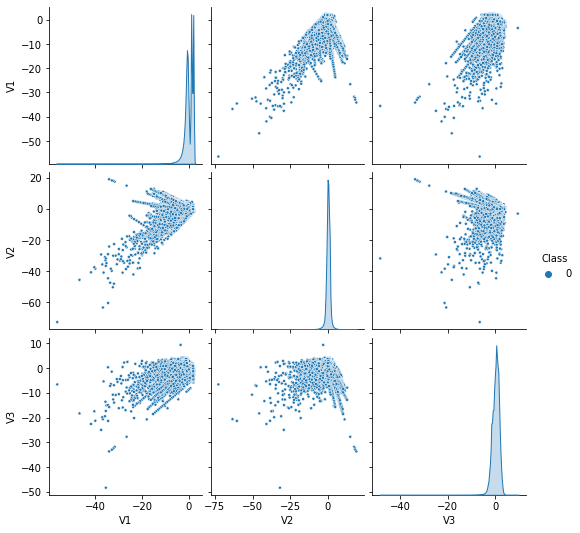

In [30]:
sns.pairplot(df[df['Class']==0], vars=["V1", "V2", "V3"], hue='Class',markers='.')
plt.rcParams['figure.figsize'] = 30.0,90

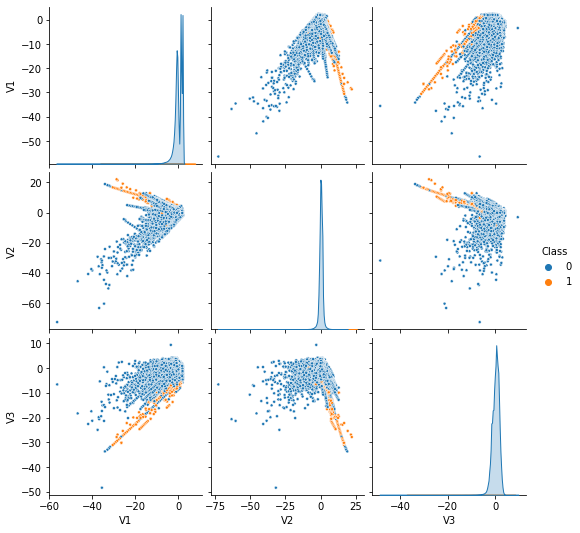

In [31]:
sns.pairplot(df, vars=["V1", "V2", "V3"], hue='Class',markers='.')
plt.rcParams['figure.figsize'] = 30.0,90

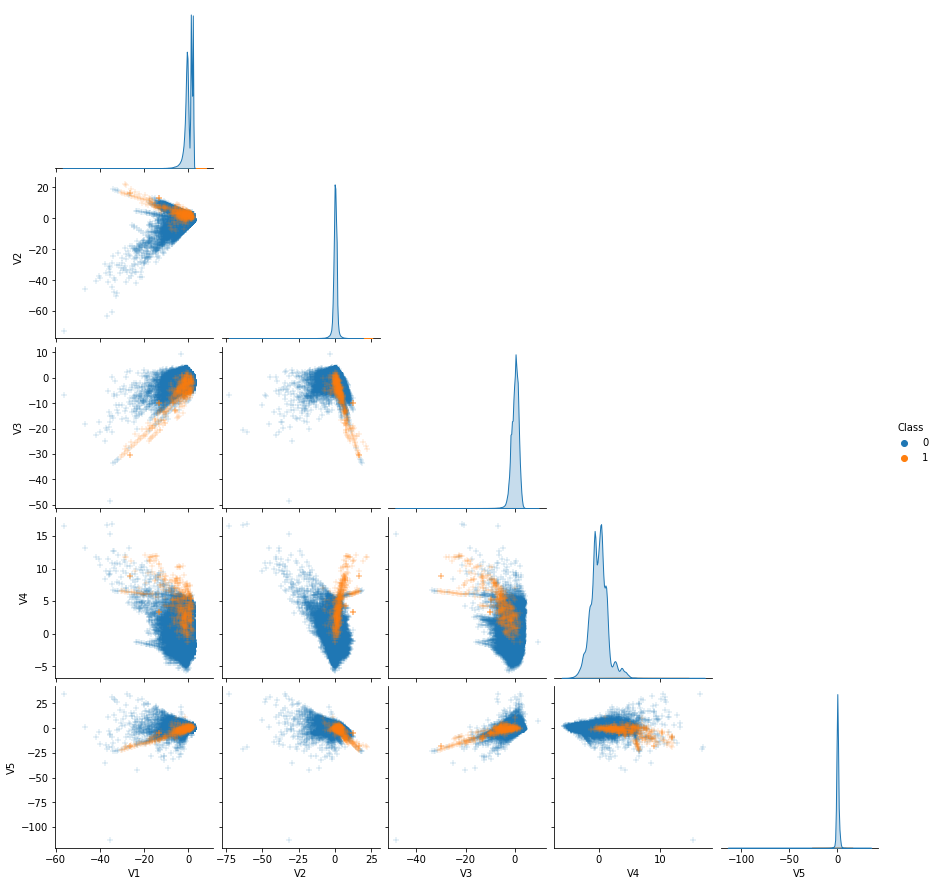

In [51]:
tempDF=df[df['Class']==0]
sns.pairplot(tempDF.append(df[df['Class']==1]),diag_kind = 'kde', vars=["V1", "V2", "V3","V4","V5"], hue='Class',markers='+', corner=True, plot_kws=dict(alpha=0.4))
plt.rcParams['figure.figsize'] = 30.0,90

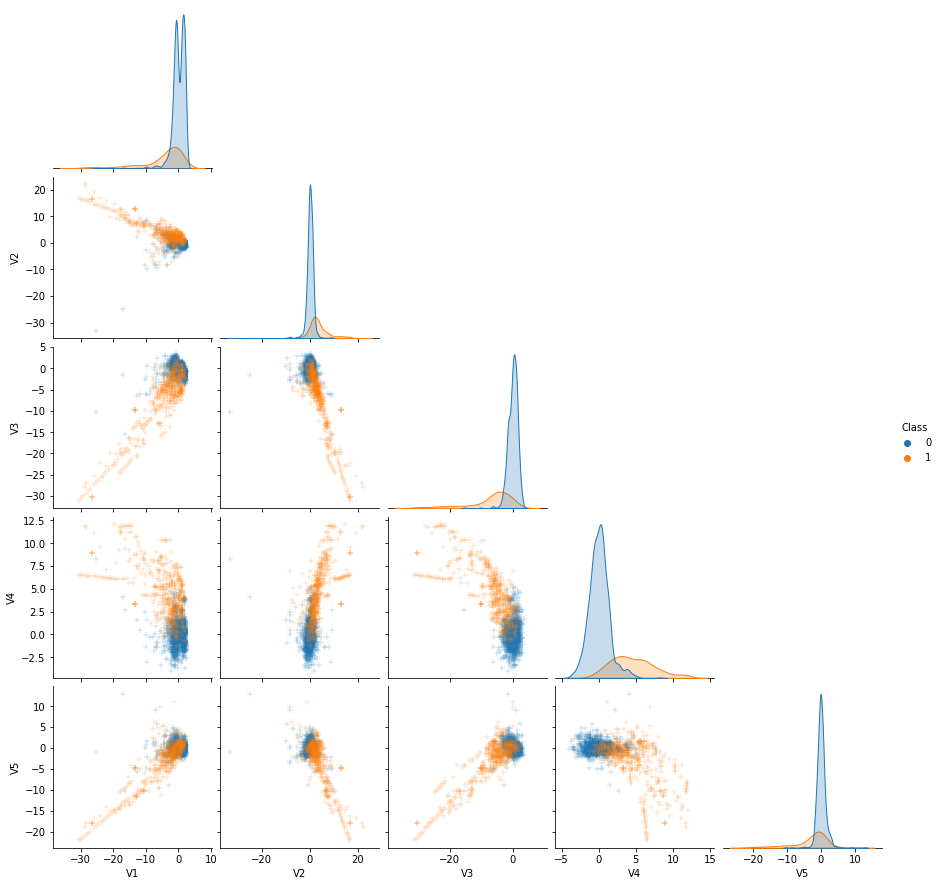

In [72]:
tempDF=df[df['Class']==0].sample(459*3)
sns.pairplot(tempDF.append(df[df['Class']==1]),diag_kind = 'kde', vars=["V1", "V2", "V3","V4","V5"], hue='Class',markers='+', corner=True, plot_kws=dict(alpha=0.4))
plt.rcParams['figure.figsize'] = 30.0,90

In [55]:
df[["Time", "Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [68]:
# plt.rcParams['figure.figsize'] = 24.0,12

# amountDF_0 = df[df['Class']==0]['Amount']
# amountDF_1 = df[df['Class']==1]['Amount']

# amountDF_0.plot.kde()
# amountDF_1.plot.kde()

# plt.xlim([df['Amount'].min() - 500 , df['Amount'].max()])

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
       ]]
y = df['Class']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [83]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Test accuracy: 99.81566%
Recall: 7.17489%


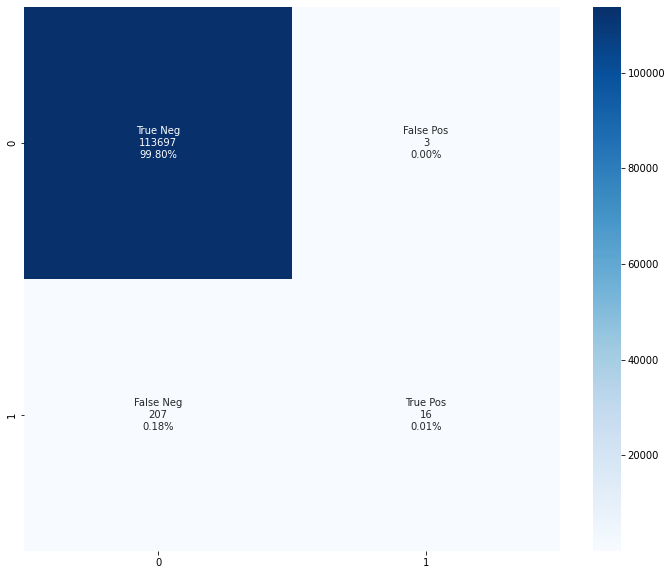

In [118]:
cm = confusion_matrix(y_test,y_pred )
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)


plt.rcParams['figure.figsize'] = 12,10
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

print('Test accuracy: {:.5f}%'.format(
    100 * float(cm[0][0]+cm[1][1]) / np.sum(cm)) )
print('Recall: {:.5f}%'.format(
    100 * float(cm[1][1]) / sum(cm[1])) )



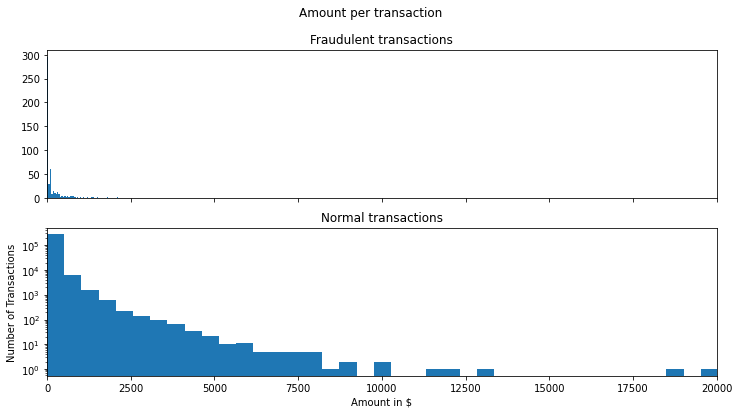

In [131]:
# Separating the fraud and normal datasets
fraud  = df[df.Class == 1]
normal = df[df.Class == 0]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

f.suptitle('Amount per transaction')

bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraudulent transactions')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal transactions')

plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();